In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv("/content/alzheimers_disease_patient_data.csv")
df

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,0,0,3.785399,0,0,0,0,1,1,XXXConfid


In [ ]:
print(df.head())

   PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0       4751   73       0          0               2  22.927749        0   
1       4752   89       0          0               0  26.827681        0   
2       4753   73       0          3               1  17.795882        0   
3       4754   74       1          0               1  33.800817        1   
4       4755   89       0          0               0  20.716974        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  ...  MemoryComplaints  \
0           13.297218          6.327112     1.347214  ...                 0   
1            4.542524          7.619885     0.518767  ...                 0   
2           19.555085          7.844988     1.826335  ...                 0   
3           12.209266          8.428001     7.435604  ...                 0   
4           18.454356          6.310461     0.795498  ...                 0   

   BehavioralProblems       ADL  Confusion  Disorientation  \
0     

In [ ]:
print(df.tail())

      PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
2144       6895   61       0          0               1  39.121757        0   
2145       6896   75       0          0               2  17.857903        0   
2146       6897   77       0          0               1  15.476479        0   
2147       6898   78       1          3               1  15.299911        0   
2148       6899   72       0          0               2  33.289738        0   

      AlcoholConsumption  PhysicalActivity  DietQuality  ...  \
2144            1.561126          4.049964     6.555306  ...   
2145           18.767261          1.360667     2.904662  ...   
2146            4.594670          9.886002     8.120025  ...   
2147            8.674505          6.354282     1.263427  ...   
2148            7.890703          6.570993     7.941404  ...   

      MemoryComplaints  BehavioralProblems       ADL  Confusion  \
2144                 0                   0  4.492838          1   
2145  

In [ ]:
print(df.shape)

(2149, 35)


In [ ]:
print(df.isnull().sum())

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

In [ ]:
print(df.isnull().sum().sum())

0


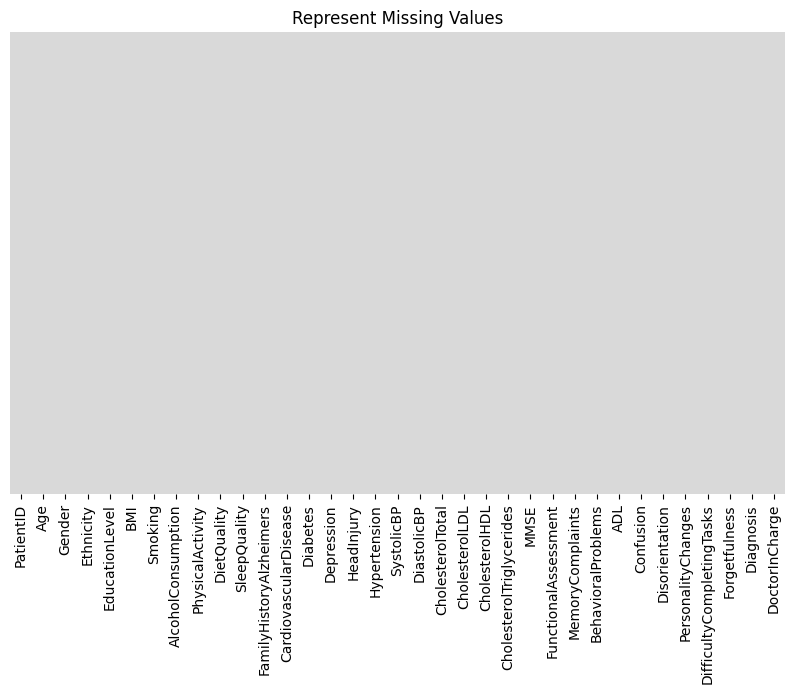

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'tab20c_r')
plt.title("Represent Missing Values")
plt.show()

In [ ]:
print(df.dtypes)

PatientID                      int64
Age                            int64
Gender                         int64
Ethnicity                      int64
EducationLevel                 int64
BMI                          float64
Smoking                        int64
AlcoholConsumption           float64
PhysicalActivity             float64
DietQuality                  float64
SleepQuality                 float64
FamilyHistoryAlzheimers        int64
CardiovascularDisease          int64
Diabetes                       int64
Depression                     int64
HeadInjury                     int64
Hypertension                   int64
SystolicBP                     int64
DiastolicBP                    int64
CholesterolTotal             float64
CholesterolLDL               float64
CholesterolHDL               float64
CholesterolTriglycerides     float64
MMSE                         float64
FunctionalAssessment         float64
MemoryComplaints               int64
BehavioralProblems             int64
A

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [ ]:
print(df.describe())

         PatientID          Age       Gender    Ethnicity  EducationLevel  \
count  2149.000000  2149.000000  2149.000000  2149.000000     2149.000000   
mean   5825.000000    74.908795     0.506282     0.697534        1.286645   
std     620.507185     8.990221     0.500077     0.996128        0.904527   
min    4751.000000    60.000000     0.000000     0.000000        0.000000   
25%    5288.000000    67.000000     0.000000     0.000000        1.000000   
50%    5825.000000    75.000000     1.000000     0.000000        1.000000   
75%    6362.000000    83.000000     1.000000     1.000000        2.000000   
max    6899.000000    90.000000     1.000000     3.000000        3.000000   

               BMI      Smoking  AlcoholConsumption  PhysicalActivity  \
count  2149.000000  2149.000000         2149.000000       2149.000000   
mean     27.655697     0.288506           10.039442          4.920202   
std       7.217438     0.453173            5.757910          2.857191   
min      15.00

In [ ]:
print(df.columns)

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')


In [8]:
df1 = df.drop(labels=['DoctorInCharge','PatientID'],axis=1)
print(df1)

      Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0      73       0          0               2  22.927749        0   
1      89       0          0               0  26.827681        0   
2      73       0          3               1  17.795882        0   
3      74       1          0               1  33.800817        1   
4      89       0          0               0  20.716974        0   
...   ...     ...        ...             ...        ...      ...   
2144   61       0          0               1  39.121757        0   
2145   75       0          0               2  17.857903        0   
2146   77       0          0               1  15.476479        0   
2147   78       1          3               1  15.299911        0   
2148   72       0          0               2  33.289738        0   

      AlcoholConsumption  PhysicalActivity  DietQuality  SleepQuality  ...  \
0              13.297218          6.327112     1.347214      9.025679  ...   
1               4.542524   

In [ ]:
print(df1.shape)

(2149, 33)


In [ ]:
df1['Gender'].value_counts()

,count
Gender,
1,1088
0,1061


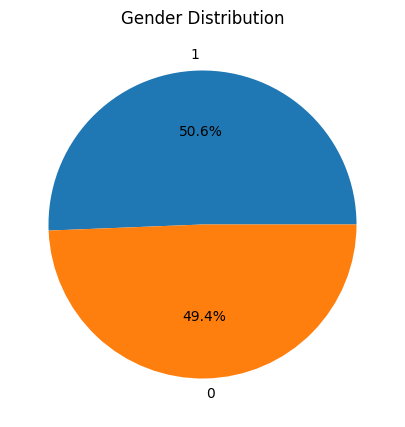

In [ ]:
plt.figure(figsize=(10, 5))
plt.pie(df1['Gender'].value_counts(), labels=df1['Gender'].value_counts().index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

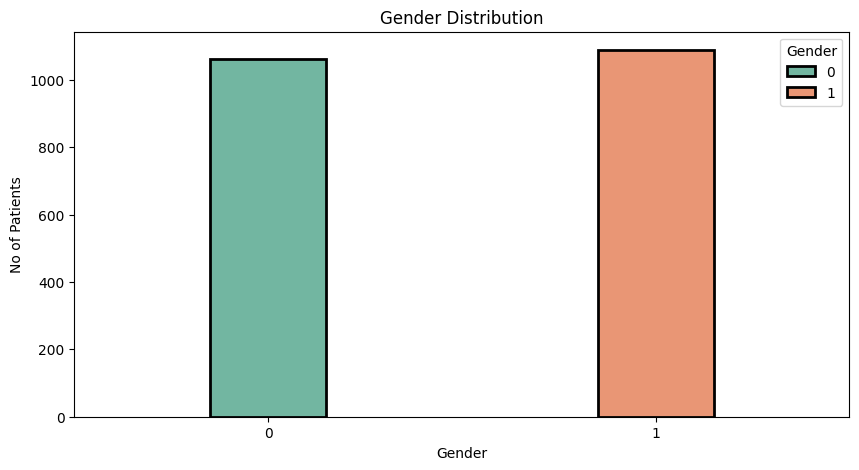

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Gender', data = df1, palette='Set2', hue='Gender', edgecolor='black', linewidth=2, width=0.3)
plt.xlabel('Gender')
plt.ylabel('No of Patients')
plt.title('Gender Distribution')
plt.show()

In [ ]:
df1['Diagnosis'].value_counts()

,count
Diagnosis,
0,1389
1,760


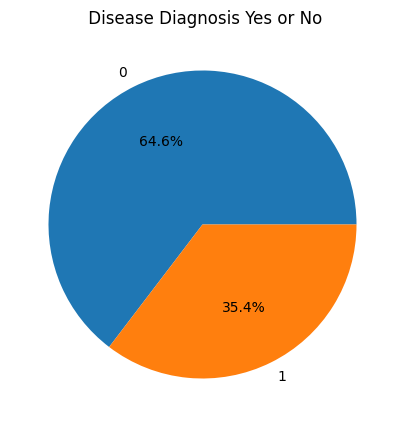

In [ ]:
plt.figure(figsize=(10, 5))
plt.pie(df1['Diagnosis'].value_counts(), labels=df1['Diagnosis'].value_counts().index, autopct='%1.1f%%')
plt.title(' Disease Diagnosis Yes or No')
plt.show()

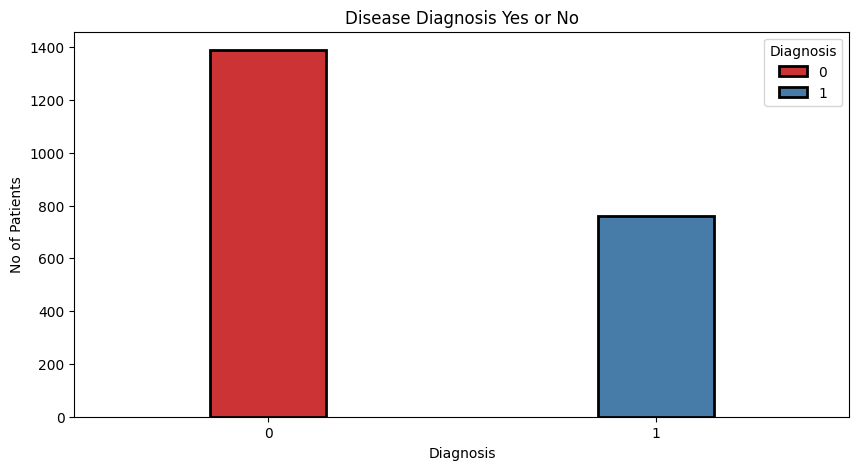

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Diagnosis', data = df1, palette='Set1', hue='Diagnosis', edgecolor='black', linewidth=2, width=0.3)
plt.xlabel('Diagnosis')
plt.ylabel('No of Patients')
plt.title('Disease Diagnosis Yes or No')
plt.show()

<Axes: >

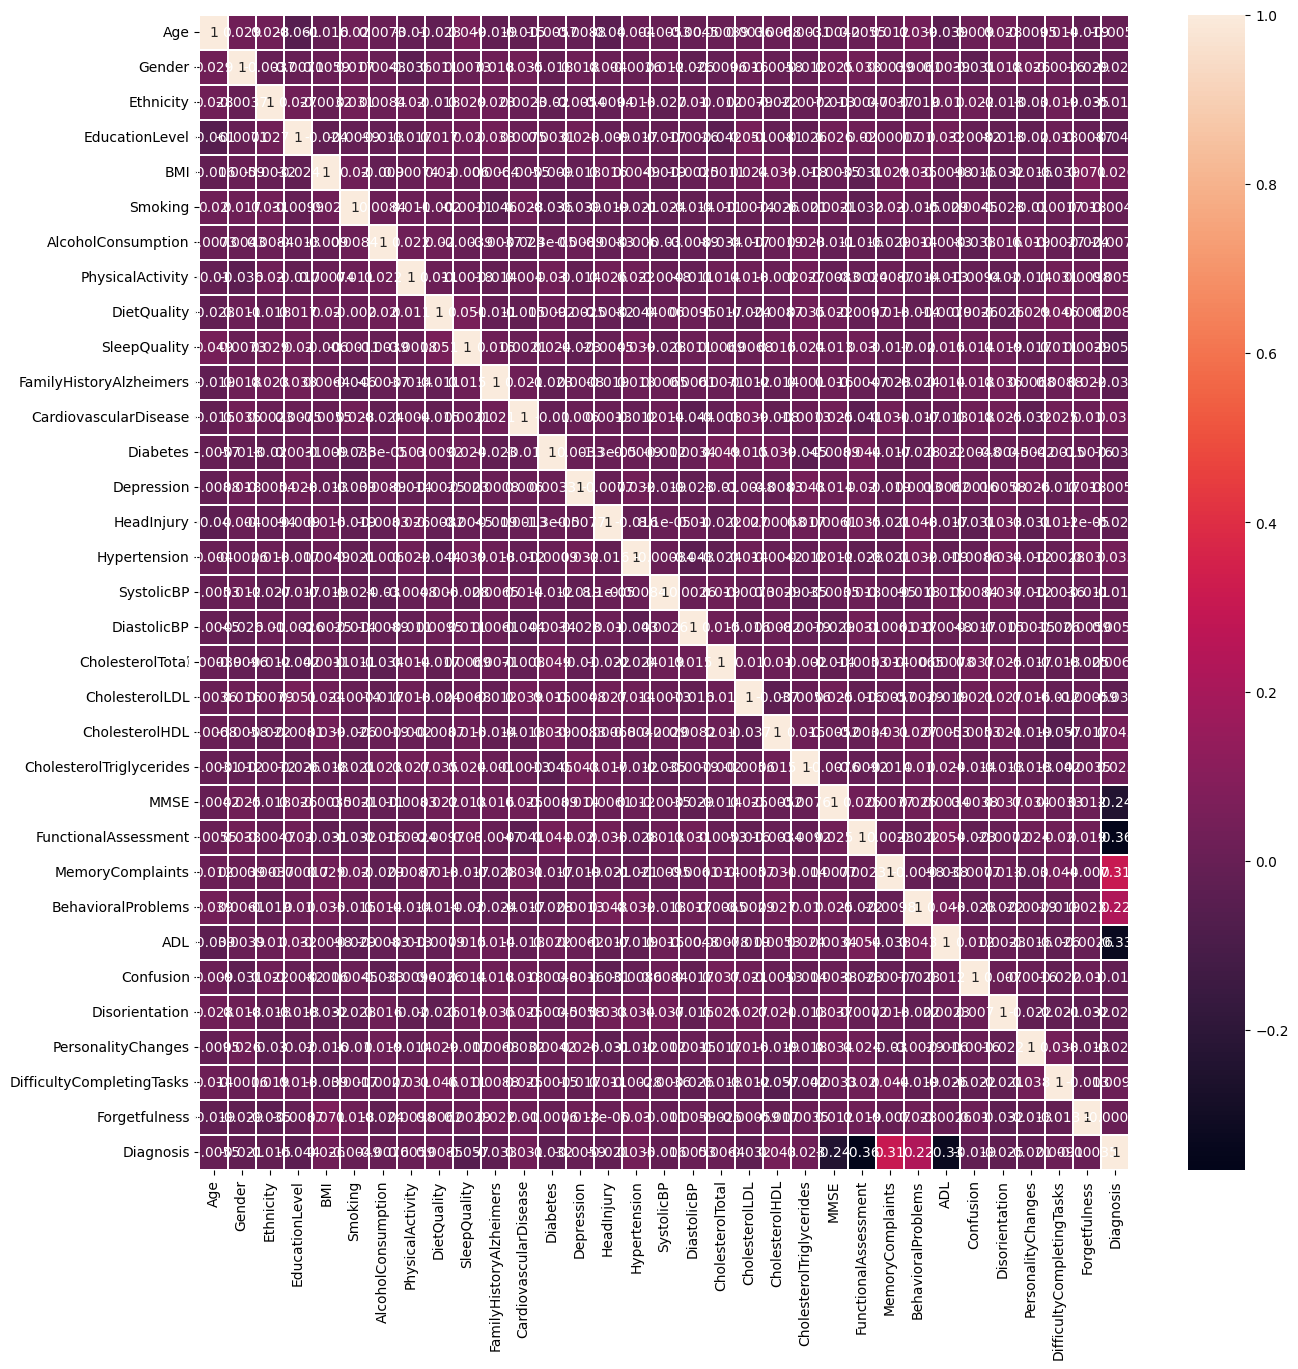

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df1.corr(),annot=True,linewidth=0.2)

In [ ]:
X = df1[['Age']].values
Y = df1['Diagnosis'].values

model = LinearRegression()
model.fit(X, Y)

slope = model.coef_[0]
intercept = model.intercept_

print(f"Intercept (b): {intercept}")
print(f"Slope (m): {slope}")

Y_pred = model.predict(X)

mse = mean_squared_error(Y, Y_pred)
print(f"Mean Squared Error (MSE): {mse}")

Intercept (b): 0.3755218645965274
Slope (m): -0.00029194172542963665
Mean Squared Error (MSE): 0.22857562971106413


In [ ]:
X = df1[['Gender']].values
Y = df1['Diagnosis'].values

model = LinearRegression()
model.fit(X, Y)

slope = model.coef_[0]
intercept = model.intercept_

print(f"Intercept (b): {intercept}")
print(f"Slope (m): {slope}")

Y_pred = model.predict(X)

mse = mean_squared_error(Y, Y_pred)
print(f"Mean Squared Error (MSE): {mse}")

Intercept (b): 0.36380772855796434
Slope (m): -0.02005772855796451
Mean Squared Error (MSE): 0.22848195289745268


Testing Mean Squared Error (MSE): 0.147055149635122


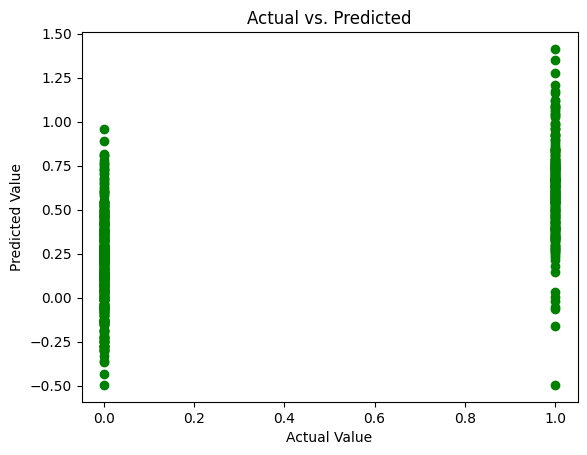

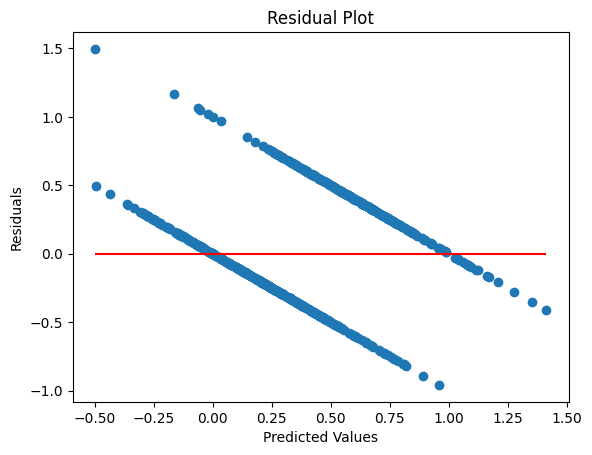

In [ ]:
X = df1.drop('Diagnosis', axis=1)
y = df1['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

test_mse = mean_squared_error(y_test, y_pred)
print(f"Testing Mean Squared Error (MSE): {test_mse}")

plt.scatter(y_test, y_pred,color='green', label='Test Data')

plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Actual vs. Predicted")
plt.show()
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), color='red')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

Mean Squared Error: 0.22918486068544275


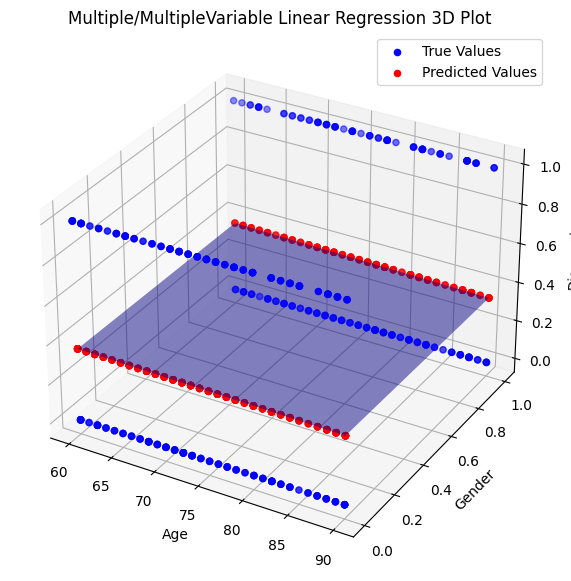

In [ ]:
X = df[['Age', 'Gender']]
Y = df['Diagnosis']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error: {mse}")

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test['Age'], X_test['Gender'], Y_test, color='blue', label='True Values')

ax.scatter(X_test['Age'], X_test['Gender'], Y_pred, color='red', label='Predicted Values')

X1_range = np.linspace(X['Age'].min(), X['Age'].max(), 100)
X2_range = np.linspace(X['Gender'].min(), X['Gender'].max(), 100)
X1_grid, X2_grid = np.meshgrid(X1_range, X2_range)

Z_grid = model.intercept_ + model.coef_[0] * X1_grid + model.coef_[1] * X2_grid

ax.plot_surface(X1_grid, X2_grid, Z_grid, alpha=0.5, cmap='plasma', rstride=100, cstride=100)

ax.set_xlabel('Age')
ax.set_ylabel('Gender')
ax.set_zlabel('Diagnosis')
ax.set_title('Multiple/MultipleVariable Linear Regression 3D Plot')

plt.legend()
plt.show()

In [ ]:
X = df1.drop('Diagnosis', axis=1)
y = df1['Diagnosis'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=105)

model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.8604651162790697
Precision: 0.8129496402877698
Recall: 0.7687074829931972
F1 Score: 0.7902097902097902
Confusion Matrix:
 [[257  26]
 [ 34 113]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.90       283
           1       0.81      0.77      0.79       147

    accuracy                           0.86       430
   macro avg       0.85      0.84      0.84       430
weighted avg       0.86      0.86      0.86       430



In [ ]:
X = df1.drop('Diagnosis', axis=1)
y = df1['Diagnosis'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=105)

model = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=5000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"OvR Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

OvR Accuracy: 0.86
Confusion Matrix:
 [[257  26]
 [ 34 113]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.90       283
           1       0.81      0.77      0.79       147

    accuracy                           0.86       430
   macro avg       0.85      0.84      0.84       430
weighted avg       0.86      0.86      0.86       430



In [ ]:
X = df1.drop('Diagnosis', axis=1)
y = df1['Diagnosis'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=105)

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=5000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Multinomial Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Multinomial Accuracy: 0.86
Confusion Matrix:
 [[255  28]
 [ 34 113]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89       283
           1       0.80      0.77      0.78       147

    accuracy                           0.86       430
   macro avg       0.84      0.83      0.84       430
weighted avg       0.85      0.86      0.86       430



In [ ]:
correlation_matrix = df1.corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                                Age    Gender  Ethnicity  EducationLevel  \
Age                        1.000000  0.028708   0.027745       -0.060560   
Gender                     0.028708  1.000000  -0.003660       -0.007070   
Ethnicity                  0.027745 -0.003660   1.000000        0.026516   
EducationLevel            -0.060560 -0.007070   0.026516        1.000000   
BMI                       -0.015677  0.005928  -0.003176       -0.023514   
Smoking                    0.020060  0.016650   0.031485       -0.009904   
AlcoholConsumption         0.007323  0.004330   0.008363       -0.012646   
PhysicalActivity          -0.010249 -0.035795   0.020498       -0.016703   
DietQuality               -0.023386  0.010942  -0.018184        0.017412   
SleepQuality               0.049139  0.007310   0.029304        0.020248   
FamilyHistoryAlzheimers   -0.018784  0.018421   0.022526        0.032748   
CardiovascularDisease     -0.015284  0.034577   0.002347        0.00


Cross-validation scores on all features:
[0.83430233 0.81686047 0.81686047 0.8255814  0.86880466]
Mean CV Accuracy (All Features): 0.8325

Accuracy on test data (All Features): 0.8558

Confusion Matrix (All Features):
[[255  28]
 [ 34 113]]


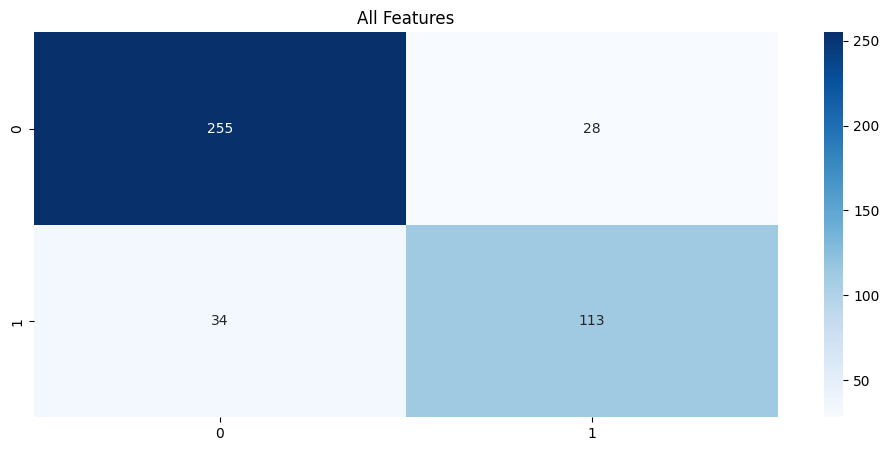

In [ ]:
X = df1.drop('Diagnosis', axis=1)
y = df1['Diagnosis'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=105)

model = LogisticRegression(max_iter=10000, multi_class='multinomial', solver='lbfgs')

cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("\nCross-validation scores on all features:")
print(cv_scores)
print(f"Mean CV Accuracy (All Features): {np.mean(cv_scores):.4f}")

model.fit(X_train, y_train)
y_pred_all = model.predict(X_test)
accuracy_all = accuracy_score(y_test, y_pred_all)
print(f"\nAccuracy on test data (All Features): {accuracy_all:.4f}")

print("\nConfusion Matrix (All Features):")
print(confusion_matrix(y_test, y_pred_all))

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)

sns.heatmap(confusion_matrix(y_test, y_pred_all), annot=True, fmt='d', ax=ax, cmap='Blues')
ax.set_title('All Features')
plt.show()

In [9]:
X = df1.drop('Diagnosis', axis=1)
y = df1['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=105)

svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.86


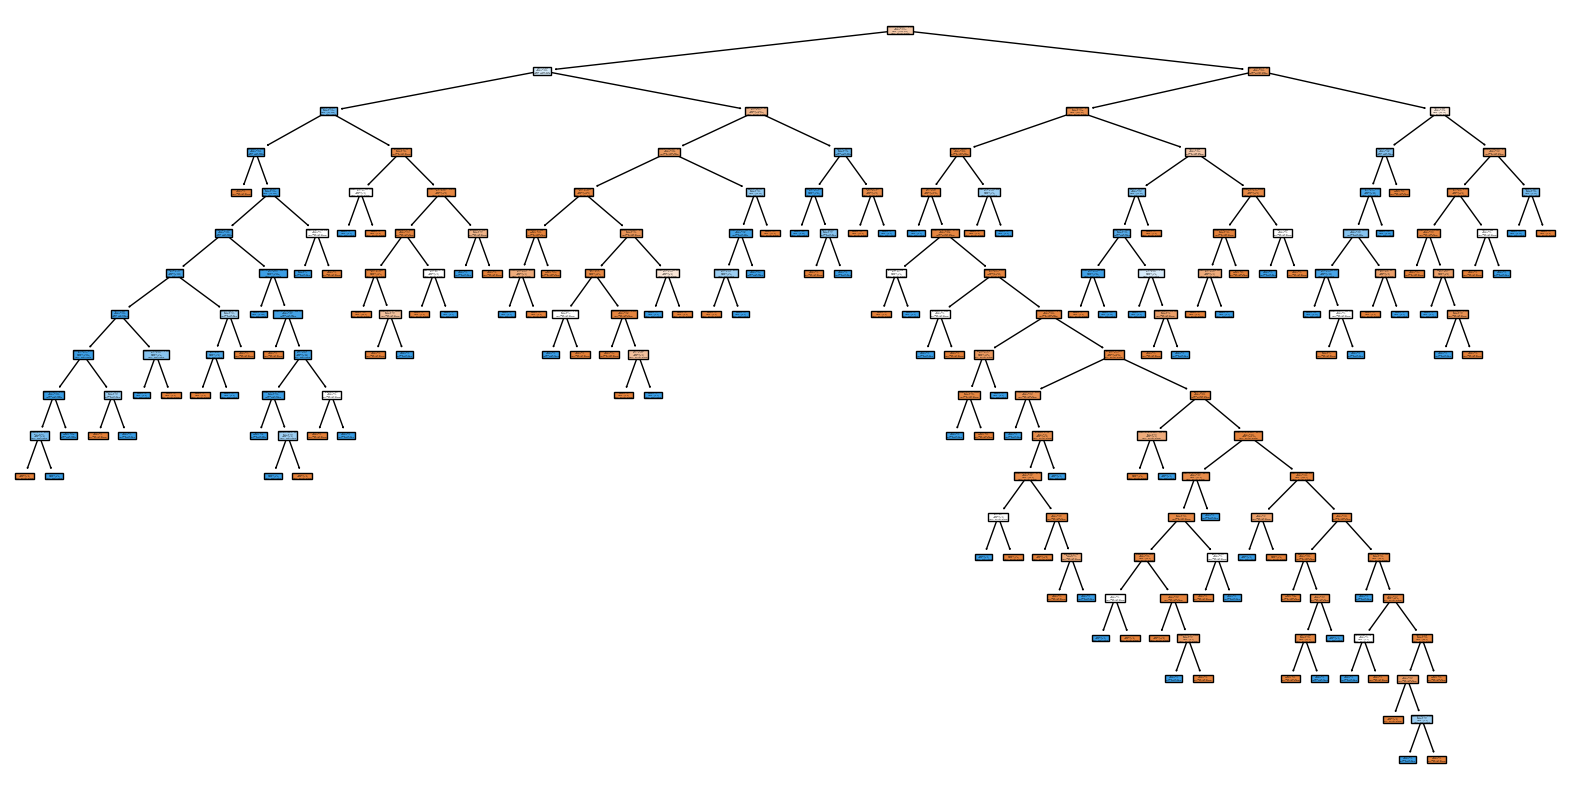

Confusion Matrix:
[[261  22]
 [ 18 129]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       283
           1       0.85      0.88      0.87       147

    accuracy                           0.91       430
   macro avg       0.89      0.90      0.90       430
weighted avg       0.91      0.91      0.91       430


Accuracy Score:
0.9069767441860465


In [ ]:
X = df1.drop('Diagnosis', axis=1)
y = df1['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=105)

clf = DecisionTreeClassifier(random_state=105)

clf.fit(X_train, y_train)

plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['No Heart Disease', 'Heart Disease'], filled=True) # Use X.columns and define class names
plt.show()

y_pred = clf.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

In [ ]:
X = df1.drop('Diagnosis', axis=1)
y = df1['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=105)

rf_model = RandomForestClassifier(n_estimators=1000, random_state=110)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f'Random Forest Model Accuracy: {accuracy:.2f}')

importances = rf_model.feature_importances_
feature_names = X.columns
for feature, importance in zip(feature_names, importances):
    print(f'Feature: {feature}, Importance: {importance:.4f}')

Random Forest Model Accuracy: 0.94
Feature: Age, Importance: 0.0237
Feature: Gender, Importance: 0.0039
Feature: Ethnicity, Importance: 0.0076
Feature: EducationLevel, Importance: 0.0096
Feature: BMI, Importance: 0.0309
Feature: Smoking, Importance: 0.0035
Feature: AlcoholConsumption, Importance: 0.0280
Feature: PhysicalActivity, Importance: 0.0300
Feature: DietQuality, Importance: 0.0312
Feature: SleepQuality, Importance: 0.0310
Feature: FamilyHistoryAlzheimers, Importance: 0.0035
Feature: CardiovascularDisease, Importance: 0.0034
Feature: Diabetes, Importance: 0.0031
Feature: Depression, Importance: 0.0037
Feature: HeadInjury, Importance: 0.0028
Feature: Hypertension, Importance: 0.0037
Feature: SystolicBP, Importance: 0.0254
Feature: DiastolicBP, Importance: 0.0247
Feature: CholesterolTotal, Importance: 0.0281
Feature: CholesterolLDL, Importance: 0.0280
Feature: CholesterolHDL, Importance: 0.0291
Feature: CholesterolTriglycerides, Importance: 0.0302
Feature: MMSE, Importance: 0.1221